# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
import zipfile

In [2]:
zf = zipfile.ZipFile('data_all.zip')

In [3]:
%%time
df = pd.read_csv(zf.open('data_all.csv'), low_memory=False)

Wall time: 14.9 s


In [4]:
im1 = df.iloc[56000,1:785]
im1.shape

(784,)

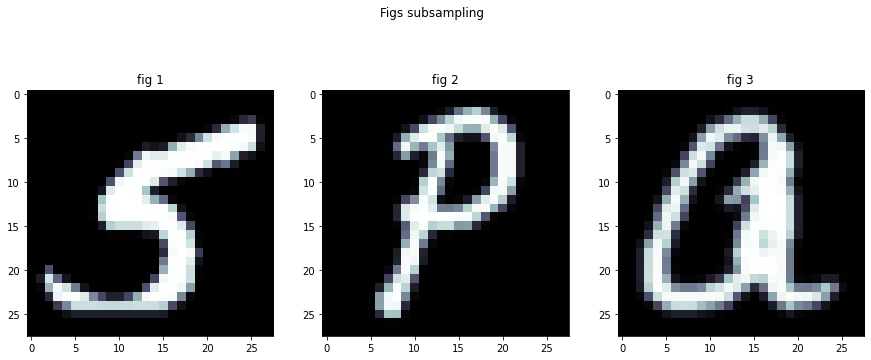

In [5]:
# fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,4))
# ax.imshow(im1.values.reshape(28, 28), cmap=plt.cm.bone, interpolation='nearest')

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

ax0.set_title('fig 1')
ax0.imshow(df.iloc[1000,1:785].values.reshape(28, 28), cmap=plt.cm.bone, interpolation='nearest')

ax1.set_title('fig 2')
ax1.imshow(df.iloc[56000,1:785].values.reshape(28, 28), cmap=plt.cm.bone, interpolation='nearest')

ax2.set_title('fig 3')
ax2.imshow(df.iloc[0,1:785].values.reshape(28, 28), cmap=plt.cm.bone, interpolation='nearest')

fig.suptitle('Figs subsampling')
plt.show()

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [20]:
from sklearn.naive_bayes import GaussianNB as GNB #Bayes para regresion 
from sklearn.naive_bayes import MultinomialNB as MNB #Bayes con variables discretas (categoricas)
from sklearn.naive_bayes import ComplementNB as CNB
from sklearn.naive_bayes import BernoulliNB as BNB  #Se basa en la dsitribucion binomial que a su vez son ensayos de bernoulli
#toma exitos y fracasos
# from sklearn.neighbors import KNeighborsClassifier as KNNC
#Modelos boosting
# from sklearn.ensemble import GradientBoostingClassifier as GBC
# from xgboost import XGBClassifier as XGBC
from catboost import CatBoostClassifier as CATB
# from lightgbm import LGBMClassifier as LGBMC

In [26]:
models = [GNB, MNB, CNB, BNB]

In [27]:
# Your code here
df['target'] = df['e']
mayus = df[(df["e"]>=10)&(df["e"]<=35)]
minus = df[(df["e"]>=36)]
nums = df[(df["e"]<=9)]

In [28]:
def model_testing(lista_modelos, data):    
    X_train, X_test, y_train, y_test = tts(data.drop('target', axis =1 ), data['target'])
    
    for i in lista_modelos:
        mod_name = str(i).split('.')[-1]
        mod_name = i()
        mod_name.fit(X_train, y_train)
        train_score = mod_name.score(X_train, y_train)
        test_score = mod_name.score(X_test, y_test)
        print(f"{mod_name}\ntest: {test_score}, train: {train_score}\n")

In [24]:
model_testing(models,mayus)

GaussianNB()
test: 0.9941304070435115, train: 1.0

MultinomialNB()
test: 0.6866147760622687, train: 0.6972094606091543

ComplementNB()
test: 0.4929182084981498, train: 0.4986387612727582

BernoulliNB()
test: 0.6892943728467525, train: 0.6987833928875277

Learning rate set to 0.092951
0:	learn: 2.2851226	total: 3.03s	remaining: 50m 28s
1:	learn: 1.9759233	total: 5.9s	remaining: 49m 3s
2:	learn: 1.7725071	total: 8.8s	remaining: 48m 46s
3:	learn: 1.6011600	total: 11.7s	remaining: 48m 37s
4:	learn: 1.4506519	total: 14.6s	remaining: 48m 33s
5:	learn: 1.3218837	total: 17.6s	remaining: 48m 41s
6:	learn: 1.2261426	total: 20.6s	remaining: 48m 46s
7:	learn: 1.1360500	total: 23.7s	remaining: 48m 56s
8:	learn: 1.0519066	total: 26.6s	remaining: 48m 51s
9:	learn: 0.9908204	total: 29.6s	remaining: 48m 50s
10:	learn: 0.9219395	total: 33.2s	remaining: 49m 49s
11:	learn: 0.8772045	total: 36.6s	remaining: 50m 11s
12:	learn: 0.8247576	total: 39.8s	remaining: 50m 19s
13:	learn: 0.7805276	total: 42.8s	remai

148:	learn: 0.0369269	total: 8m 13s	remaining: 46m 59s
149:	learn: 0.0369229	total: 8m 17s	remaining: 46m 56s
150:	learn: 0.0368250	total: 8m 20s	remaining: 46m 55s
151:	learn: 0.0362548	total: 8m 24s	remaining: 46m 53s
152:	learn: 0.0357170	total: 8m 27s	remaining: 46m 50s
153:	learn: 0.0353740	total: 8m 31s	remaining: 46m 48s
154:	learn: 0.0349302	total: 8m 34s	remaining: 46m 46s
155:	learn: 0.0348485	total: 8m 38s	remaining: 46m 44s
156:	learn: 0.0348455	total: 8m 41s	remaining: 46m 41s
157:	learn: 0.0346927	total: 8m 45s	remaining: 46m 39s
158:	learn: 0.0341731	total: 8m 48s	remaining: 46m 36s
159:	learn: 0.0339393	total: 8m 52s	remaining: 46m 35s
160:	learn: 0.0335263	total: 8m 56s	remaining: 46m 34s
161:	learn: 0.0332534	total: 9m	remaining: 46m 34s
162:	learn: 0.0331597	total: 9m 3s	remaining: 46m 32s
163:	learn: 0.0325722	total: 9m 7s	remaining: 46m 30s
164:	learn: 0.0325694	total: 9m 10s	remaining: 46m 27s
165:	learn: 0.0322496	total: 9m 14s	remaining: 46m 26s
166:	learn: 0.03

296:	learn: 0.0163648	total: 16m 37s	remaining: 39m 21s
297:	learn: 0.0161049	total: 16m 41s	remaining: 39m 18s
298:	learn: 0.0161042	total: 16m 44s	remaining: 39m 14s
299:	learn: 0.0160991	total: 16m 47s	remaining: 39m 11s
300:	learn: 0.0160717	total: 16m 50s	remaining: 39m 7s
301:	learn: 0.0160632	total: 16m 54s	remaining: 39m 4s
302:	learn: 0.0160453	total: 16m 57s	remaining: 39m
303:	learn: 0.0159192	total: 17m	remaining: 38m 57s
304:	learn: 0.0158531	total: 17m 4s	remaining: 38m 53s
305:	learn: 0.0158465	total: 17m 7s	remaining: 38m 50s
306:	learn: 0.0158393	total: 17m 10s	remaining: 38m 46s
307:	learn: 0.0156562	total: 17m 13s	remaining: 38m 42s
308:	learn: 0.0156231	total: 17m 17s	remaining: 38m 39s
309:	learn: 0.0154532	total: 17m 20s	remaining: 38m 35s
310:	learn: 0.0153826	total: 17m 23s	remaining: 38m 32s
311:	learn: 0.0151818	total: 17m 27s	remaining: 38m 29s
312:	learn: 0.0151467	total: 17m 30s	remaining: 38m 25s
313:	learn: 0.0150010	total: 17m 33s	remaining: 38m 22s
314:

444:	learn: 0.0103922	total: 25m 13s	remaining: 31m 27s
445:	learn: 0.0103702	total: 25m 16s	remaining: 31m 23s
446:	learn: 0.0103654	total: 25m 20s	remaining: 31m 20s
447:	learn: 0.0103616	total: 25m 23s	remaining: 31m 17s
448:	learn: 0.0103612	total: 25m 27s	remaining: 31m 14s
449:	learn: 0.0103602	total: 25m 30s	remaining: 31m 10s
450:	learn: 0.0103418	total: 25m 34s	remaining: 31m 7s
451:	learn: 0.0103357	total: 25m 37s	remaining: 31m 4s
452:	learn: 0.0103314	total: 25m 41s	remaining: 31m 1s
453:	learn: 0.0103242	total: 25m 44s	remaining: 30m 57s
454:	learn: 0.0102319	total: 25m 48s	remaining: 30m 54s
455:	learn: 0.0101087	total: 25m 52s	remaining: 30m 51s
456:	learn: 0.0101059	total: 25m 55s	remaining: 30m 48s
457:	learn: 0.0100713	total: 25m 59s	remaining: 30m 45s
458:	learn: 0.0100501	total: 26m 3s	remaining: 30m 42s
459:	learn: 0.0100338	total: 26m 6s	remaining: 30m 39s
460:	learn: 0.0100200	total: 26m 10s	remaining: 30m 35s
461:	learn: 0.0100157	total: 26m 13s	remaining: 30m 3

592:	learn: 0.0078051	total: 33m 29s	remaining: 22m 58s
593:	learn: 0.0078025	total: 33m 32s	remaining: 22m 55s
594:	learn: 0.0077955	total: 33m 36s	remaining: 22m 52s
595:	learn: 0.0077924	total: 33m 39s	remaining: 22m 48s
596:	learn: 0.0077885	total: 33m 42s	remaining: 22m 45s
597:	learn: 0.0077118	total: 33m 45s	remaining: 22m 41s
598:	learn: 0.0077054	total: 33m 49s	remaining: 22m 38s
599:	learn: 0.0076930	total: 33m 52s	remaining: 22m 35s
600:	learn: 0.0076829	total: 33m 55s	remaining: 22m 31s
601:	learn: 0.0076808	total: 33m 59s	remaining: 22m 28s
602:	learn: 0.0076760	total: 34m 2s	remaining: 22m 24s
603:	learn: 0.0076704	total: 34m 6s	remaining: 22m 21s
604:	learn: 0.0076604	total: 34m 9s	remaining: 22m 18s
605:	learn: 0.0076158	total: 34m 12s	remaining: 22m 14s
606:	learn: 0.0076100	total: 34m 16s	remaining: 22m 11s
607:	learn: 0.0075785	total: 34m 19s	remaining: 22m 7s
608:	learn: 0.0075764	total: 34m 22s	remaining: 22m 4s
609:	learn: 0.0075185	total: 34m 26s	remaining: 22m
6

740:	learn: 0.0058134	total: 41m 45s	remaining: 14m 35s
741:	learn: 0.0058124	total: 41m 48s	remaining: 14m 32s
742:	learn: 0.0058101	total: 41m 52s	remaining: 14m 29s
743:	learn: 0.0058038	total: 41m 56s	remaining: 14m 25s
744:	learn: 0.0057975	total: 41m 59s	remaining: 14m 22s
745:	learn: 0.0057915	total: 42m 3s	remaining: 14m 19s
746:	learn: 0.0057619	total: 42m 6s	remaining: 14m 15s
747:	learn: 0.0057578	total: 42m 10s	remaining: 14m 12s
748:	learn: 0.0056980	total: 42m 13s	remaining: 14m 9s
749:	learn: 0.0056914	total: 42m 16s	remaining: 14m 5s
750:	learn: 0.0056913	total: 42m 20s	remaining: 14m 2s
751:	learn: 0.0056838	total: 42m 23s	remaining: 13m 58s
752:	learn: 0.0056801	total: 42m 26s	remaining: 13m 55s
753:	learn: 0.0056790	total: 42m 30s	remaining: 13m 52s
754:	learn: 0.0056730	total: 42m 33s	remaining: 13m 48s
755:	learn: 0.0056718	total: 42m 37s	remaining: 13m 45s
756:	learn: 0.0056692	total: 42m 40s	remaining: 13m 41s
757:	learn: 0.0056680	total: 42m 44s	remaining: 13m 3

889:	learn: 0.0043296	total: 50m 20s	remaining: 6m 13s
890:	learn: 0.0043207	total: 50m 24s	remaining: 6m 9s
891:	learn: 0.0043063	total: 50m 28s	remaining: 6m 6s
892:	learn: 0.0043026	total: 50m 31s	remaining: 6m 3s
893:	learn: 0.0042990	total: 50m 35s	remaining: 5m 59s
894:	learn: 0.0042626	total: 50m 38s	remaining: 5m 56s
895:	learn: 0.0042624	total: 50m 41s	remaining: 5m 53s
896:	learn: 0.0042553	total: 50m 45s	remaining: 5m 49s
897:	learn: 0.0042168	total: 50m 48s	remaining: 5m 46s
898:	learn: 0.0042102	total: 50m 52s	remaining: 5m 42s
899:	learn: 0.0042044	total: 50m 55s	remaining: 5m 39s
900:	learn: 0.0042011	total: 50m 59s	remaining: 5m 36s
901:	learn: 0.0041975	total: 51m 3s	remaining: 5m 32s
902:	learn: 0.0041956	total: 51m 6s	remaining: 5m 29s
903:	learn: 0.0041897	total: 51m 9s	remaining: 5m 25s
904:	learn: 0.0041868	total: 51m 13s	remaining: 5m 22s
905:	learn: 0.0041831	total: 51m 16s	remaining: 5m 19s
906:	learn: 0.0041724	total: 51m 19s	remaining: 5m 15s
907:	learn: 0.00

* Try to do the same thing with lowercases.

In [29]:
# Your code here
model_testing(models,minus)

GaussianNB()
test: 0.991130820399113, train: 0.9999507243520253

MultinomialNB()
test: 0.6378418329637842, train: 0.6435892381984823

ComplementNB()
test: 0.5033259423503326, train: 0.5118754311619198

BernoulliNB()
test: 0.6362158167036216, train: 0.641716763575441



* Try to do the same thing with numbers.

In [30]:
# Your code here
model_testing(models,nums)

GaussianNB()
test: 0.9985497237569061, train: 1.0

MultinomialNB()
test: 0.8180939226519337, train: 0.8161517565265436

ComplementNB()
test: 0.7108425414364641, train: 0.7134076154519085

BernoulliNB()
test: 0.8279696132596686, train: 0.8251761130807127

